In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np
df_EX = pd.read_csv("Extremely_Hot_Days 2009-2013.csv")
df_EX

,County Name,Census Tract,# Extremely Hot Days
0,Adams,53001950100,1
1,Adams,53001950200,1
2,Adams,53001950300,1
3,Adams,53001950400,1
4,Adams,53001950500,1
...,...,...,...
7245,Yakima,53077940002,1
7246,Yakima,53077940003,1
7247,Yakima,53077940004,1
7248,Yakima,53077940005,1


Text(0.5, 0, 'County Names')

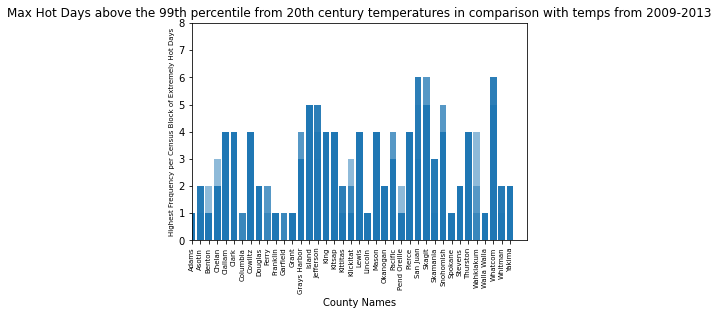

In [73]:
df_EX = pd.read_csv("Extremely_Hot_Days 2009-2013.csv")
plt.figure()
plt.xlim([0,40])
plt.ylim([0,8])
plt.bar(df_EX['County Name'],df_EX['# Extremely Hot Days'],alpha = 0.5)
plt.xticks(rotation=90, fontsize=7)
plt.title("Max Hot Days above the 99th percentile of 20th century temperatures in comparison with temps from 2009-2013")
plt.ylabel("Highest Frequency per Census Block of Extremely Hot Days",fontsize=7)
plt.xlabel("County Names")


In [28]:
df_by_county_Extreme_avg = df_EX.groupby('County Name', as_index=False).agg({"# Extremely Hot Days": "mean"})

In [76]:
df_by_county_Extreme_avg

,County Name,# Extremely Hot Days
0,Adams,0.480000
1,Asotin,0.766667
2,Benton,0.605405
3,Chelan,1.028571
4,Clallam,1.600000
5,Clark,1.169231
6,Columbia,0.600000
7,Cowlitz,1.216667
8,Douglas,0.900000
9,Ferry,0.333333


In [18]:
df_Fires = pd.read_csv("Wildfires_09-13.csv")

In [19]:
df_Fires

,County Name,# of Fires,Acres Burned,Percent Area Burned
0,Adams,0,0,0.00
1,Asotin,0,0,0.00
2,Benton,0,0,0.00
3,Chelan,3,2281,0.12
4,Clallam,0,0,0.00
...,...,...,...,...
190,Wahkiakum,0,0,0.00
191,Walla Walla,0,0,0.00
192,Whatcom,0,0,0.00
193,Whitman,0,0,0.00


In [20]:
df_by_county_Fires = df_Fires.groupby('County Name', as_index=False).agg({"# of Fires": "sum"})

In [21]:
df_main = pd.merge(df_by_county_Extreme_avg, df_by_county_Fires)

In [22]:
df_main

,County Name,# Extremely Hot Days,# of Fires
0,Adams,0.480000,1
1,Asotin,0.766667,3
2,Benton,0.605405,4
3,Chelan,1.028571,38
4,Clallam,1.600000,0
5,Clark,1.169231,0
6,Columbia,0.600000,0
7,Cowlitz,1.216667,0
8,Douglas,0.900000,6
9,Ferry,0.333333,11


Text(0.5, 1.0, 'Plot for all the counties')

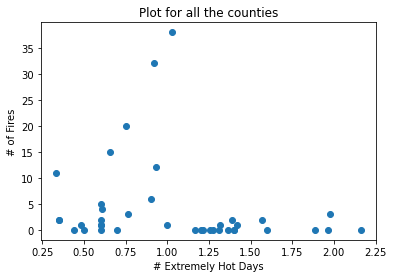

In [23]:
plt.plot(df_main['# Extremely Hot Days'],df_main['# of Fires'],'o')
plt.xlabel('# Extremely Hot Days')
plt.ylabel('# of Fires')
plt.title('Plot for all the counties')

In [25]:
df_main.corr()

,# Extremely Hot Days,# of Fires
# Extremely Hot Days,1.000000,-0.189781
# of Fires,-0.189781,1.000000


In [30]:
df_main.describe()

,# Extremely Hot Days,# of Fires
count,39.000000,39.000000
mean,1.040998,4.230769
std,0.494641,8.554659
min,0.333333,0.000000
25%,0.600000,0.000000
50%,1.000000,1.000000
75%,1.377558,3.000000
max,2.160000,38.000000


In [31]:
df_CentralWa = df_main.loc[[2,3,8,12,18,19,23,38], :]

In [32]:
df_EasternWa = df_main.loc[[0,1,6,9,10,11,21,25,31,32,35,37], :]

In [33]:
df_WesternWa = df_main.loc[[4,5,7,13,14,15,16,17,20,22,24,26,27,28,29,30,33,34,36], :]

In [34]:
df_CentralWa


,County Name,# Extremely Hot Days,# of Fires
2,Benton,0.605405,4
3,Chelan,1.028571,38
8,Douglas,0.900000,6
12,Grant,0.600000,5
18,Kittitas,0.750000,20
19,Klickitat,0.933333,12
23,Okanogan,0.920000,32
38,Yakima,0.657778,15


In [35]:
df_EasternWa

,County Name,# Extremely Hot Days,# of Fires
0,Adams,0.480000,1
1,Asotin,0.766667,3
6,Columbia,0.600000,0
9,Ferry,0.333333,11
10,Franklin,0.600000,1
11,Garfield,0.600000,1
21,Lincoln,0.350000,2
25,Pend Oreille,0.440000,0
31,Spokane,0.502857,0
32,Stevens,0.350000,2


In [36]:
df_WesternWa

,County Name,# Extremely Hot Days,# of Fires
4,Clallam,1.600000,0
5,Clark,1.169231,0
7,Cowlitz,1.216667,0
13,Grays Harbor,1.200000,0
14,Island,1.885714,0
15,Jefferson,1.571429,2
16,King,1.312846,0
17,Kitsap,1.274074,0
20,Lewis,1.390000,2
22,Mason,1.314286,1


Text(0, 0.5, '# of Fires')

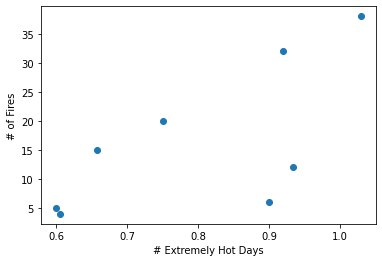

In [37]:
plt.plot(df_CentralWa['# Extremely Hot Days'],df_CentralWa['# of Fires'],'o')
plt.xlabel('# Extremely Hot Days')
plt.ylabel('# of Fires')


Text(0, 0.5, '# of Fires')

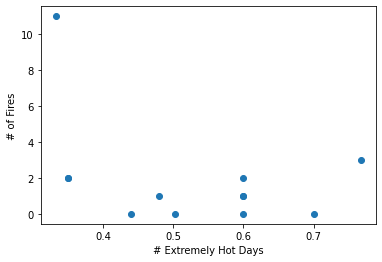

In [38]:
plt.plot(df_EasternWa['# Extremely Hot Days'],df_EasternWa['# of Fires'],'o')
plt.xlabel('# Extremely Hot Days')
plt.ylabel('# of Fires')


Text(0, 0.5, '# of Fires')

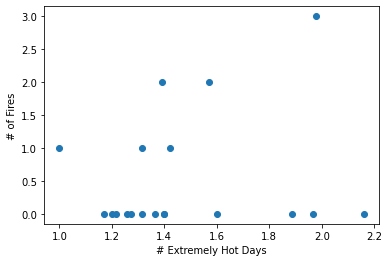

In [39]:
plt.plot(df_WesternWa['# Extremely Hot Days'],df_WesternWa['# of Fires'],'o')
plt.xlabel('# Extremely Hot Days')
plt.ylabel('# of Fires')

([<matplotlib.axis.XTick at 0x2b7dc76c550>,
 [Text(0, 0, 'West'), Text(0, 0, 'Central'), Text(0, 0, 'Eastern')])

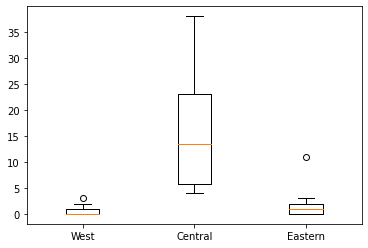

In [41]:
plt.boxplot([df_WesternWa['# of Fires'],df_CentralWa['# of Fires'],df_EasternWa['# of Fires']])
plt.xticks([1,2,3],['West',"Central","Eastern"])


{'whiskers': [<matplotlib.lines.Line2D at 0x2b7dc80fd00>,
 'caps': [<matplotlib.lines.Line2D at 0x2b7dc81b400>,
 'boxes': [<matplotlib.lines.Line2D at 0x2b7dc80f9a0>],
 'medians': [<matplotlib.lines.Line2D at 0x2b7dc81bac0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2b7dc81bdc0>],
 'means': []}

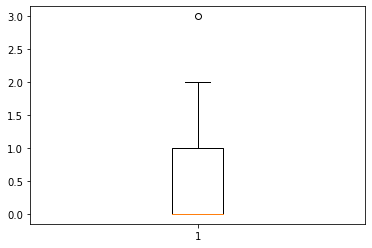

In [42]:
plt.boxplot(df_WesternWa['# of Fires'])

{'whiskers': [<matplotlib.lines.Line2D at 0x2b7dc8745b0>,
 'caps': [<matplotlib.lines.Line2D at 0x2b7dc874c70>,
 'boxes': [<matplotlib.lines.Line2D at 0x2b7dc874250>],
 'medians': [<matplotlib.lines.Line2D at 0x2b7dc87c370>],
 'fliers': [<matplotlib.lines.Line2D at 0x2b7dc87c670>],
 'means': []}

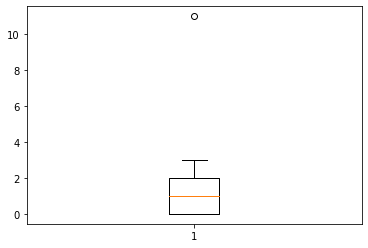

In [43]:
plt.boxplot(df_EasternWa['# of Fires'])

(array([2., 1., 0., 1., 0., 0., 0., 3., 0., 1.]),
 array([0.6       , 0.64285714, 0.68571429, 0.72857143, 0.77142857,
        0.81428571, 0.85714286, 0.9       , 0.94285714, 0.98571429,
        1.02857143]),
 <a list of 10 Patch objects>)

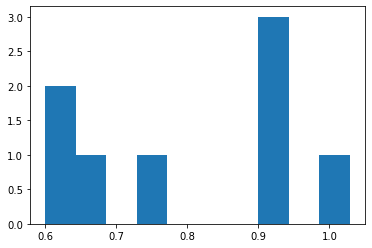

In [44]:
plt.hist(df_CentralWa['# Extremely Hot Days'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002B7DC7AE250>,
      dtype=object)

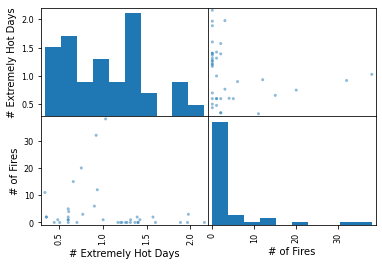

In [45]:
pd.plotting.scatter_matrix(df_main)

In [46]:
X = np.array(df_main["# Extremely Hot Days"]).reshape(-1,1)
Y = np.array(df_main["# of Fires"]).reshape(-1,1)
OLS = LinearRegression()
OLS.fit(X,Y)
yhat = OLS.predict(X)

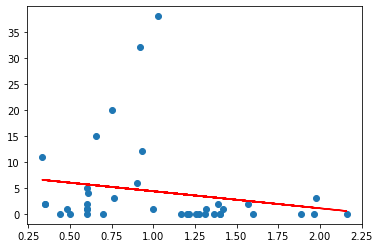

In [47]:
plt.scatter(X,Y)
plt.plot(X,yhat,color='red')

IndexError: index 39 is out of bounds for axis 0 with size 39

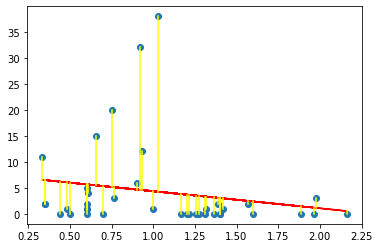

In [48]:
plt.scatter(X,Y)
plt.plot(X,yhat,color='red')
for i in range(50):
    plt.plot([X[i],X[i]],[Y[i],yhat[i]],color='yellow')

In [49]:
X = np.array(df_CentralWa["# Extremely Hot Days"]).reshape(-1,1)
Y = np.array(df_CentralWa["# of Fires"]).reshape(-1,1)
OLS = LinearRegression()
OLS.fit(X,Y)
yhat = OLS.predict(X)

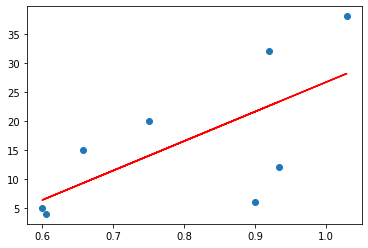

In [50]:
plt.scatter(X,Y)
plt.plot(X,yhat,color='red')

In [51]:
X = np.array(df_EasternWa["# Extremely Hot Days"]).reshape(-1,1)
Y = np.array(df_EasternWa["# of Fires"]).reshape(-1,1)
OLS = LinearRegression()
OLS.fit(X,Y)
yhat = OLS.predict(X)

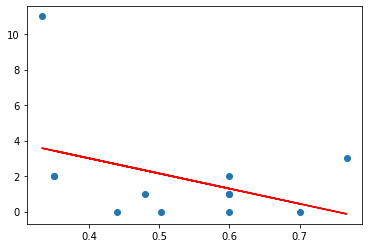

In [52]:
plt.scatter(X,Y)
plt.plot(X,yhat,color='red')

In [53]:
X = np.array(df_WesternWa["# Extremely Hot Days"]).reshape(-1,1)
Y = np.array(df_WesternWa["# of Fires"]).reshape(-1,1)
OLS = LinearRegression()
OLS.fit(X,Y)
yhat = OLS.predict(X)

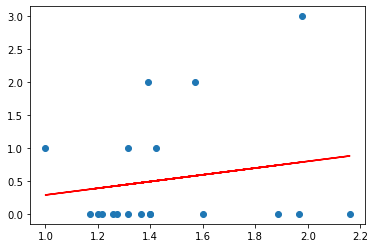

In [54]:
plt.scatter(X,Y)
plt.plot(X,yhat,color='red')

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18],
 <a list of 19 Text major ticklabel objects>)

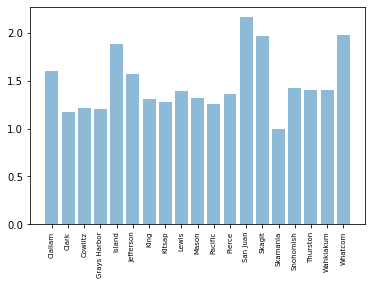

In [56]:
plt.figure()
plt.bar(df_WesternWa['County Name'],df_WesternWa['# Extremely Hot Days'],alpha = 0.5)
plt.xticks(rotation=90, fontsize=7)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 <a list of 12 Text major ticklabel objects>)

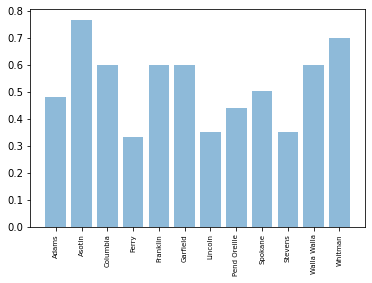

In [57]:
plt.figure()
plt.bar(df_EasternWa['County Name'],df_EasternWa['# Extremely Hot Days'],alpha = 0.5)
plt.xticks(rotation=90, fontsize=7)

([0, 1, 2, 3, 4, 5, 6, 7], <a list of 8 Text major ticklabel objects>)

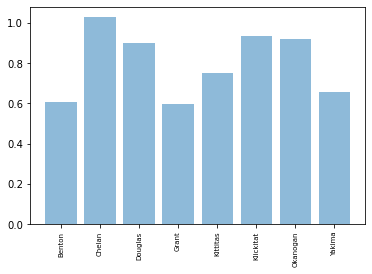

In [58]:
plt.figure()
plt.bar(df_CentralWa['County Name'],df_CentralWa['# Extremely Hot Days'],alpha = 0.5)
plt.xticks(rotation=90, fontsize=7)

([0, 1, 2, 3, 4, 5, 6, 7], <a list of 8 Text major ticklabel objects>)

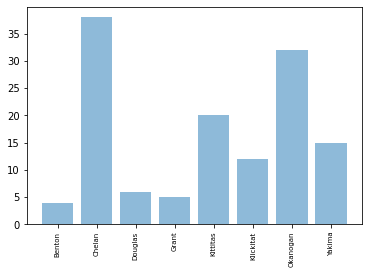

In [59]:
plt.figure()

plt.bar(df_CentralWa['County Name'],df_CentralWa['# of Fires'],alpha = 0.5)
plt.xticks(rotation=90, fontsize=7)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 <a list of 12 Text major ticklabel objects>)

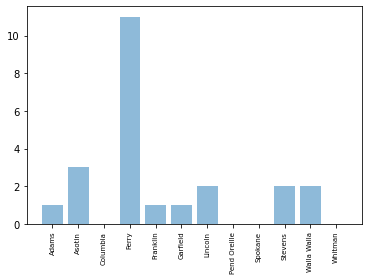

In [60]:
plt.figure()
plt.bar(df_EasternWa['County Name'],df_EasternWa['# of Fires'],alpha = 0.5)
plt.xticks(rotation=90, fontsize=7)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18],
 <a list of 19 Text major ticklabel objects>)

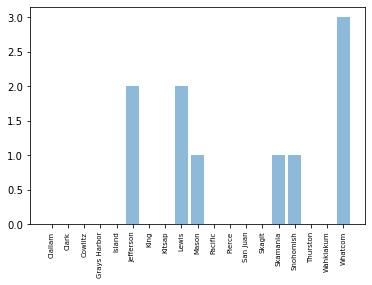

In [61]:
plt.figure()
plt.bar(df_WesternWa['County Name'],df_WesternWa['# of Fires'],alpha = 0.5)
plt.xticks(rotation=90, fontsize=7)